Now that the neural network is built, able to have data passed through it, and capable of 
calculating loss, the next step is to determine how to adjust the weights and biases to decrease the 
loss. Finding an intelligent way to adjust the neurons’ input’s weights and biases to minimize loss 
is the main difficulty of neural networks.

The first option one might think of is randomly changing the weights, checking the loss, and 
repeating this until happy with the lowest loss found. To see this in action, we’ll use a simpler 
dataset than we’ve been working with so far:

In [1]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
        
        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probabilities
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        samples = len(y_pred)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true, axis = 1)
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods

    

#### Checking with randomly choosing parameters

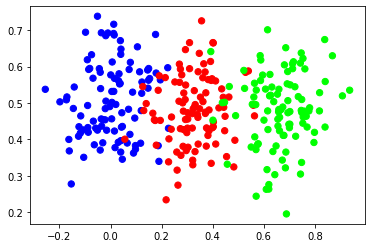

In [2]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
import numpy as np
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [3]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

Then create some variables to track the best loss and the associated weights and biases:

In [4]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [5]:
 def itte(itt,lowest_loss):
    for iteration in range(itt):
        # Generate a new set of weights for iteration
        dense1.weights = 0.05 * np.random.randn(2, 3)
        dense1.biases = 0.05 * np.random.randn(1, 3)
        dense2.weights = 0.05 * np.random.randn(3, 3)
        dense2.biases = 0.05 * np.random.randn(1, 3)
        # Perform a forward pass of the training data through this layer
        dense1.forward(X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        # Perform a forward pass through activation function
        # it takes the output of second dense layer here and returns loss
        loss = loss_function.calculate(activation2.output, y)
        # Calculate accuracy from output of activation2 and targets
        # calculate values along first axis
        predictions = np.argmax(activation2.output, axis=1)
        accuracy = np.mean(predictions == y)
        # If loss is smaller - print and save weights and biases aside
        if loss < lowest_loss:
            print('New set of weights found, iteration:', iteration,
            'loss:', loss, 'acc:', accuracy)
            best_dense1_weights = dense1.weights.copy()
            best_dense1_biases = dense1.biases.copy()
            best_dense2_weights = dense2.weights.copy()
            best_dense2_biases = dense2.biases.copy()
            lowest_loss = loss
    return lowest_loss


Run for 10000 itteration

In [6]:
ls = itte(10000,lowest_loss)

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333


Now run for 90000 itteration

In [7]:
ls = itte(90000,ls)

New set of weights found, iteration: 78633 loss: 1.0952065 acc: 0.3333333333333333


Instead of choosing parameters randomly now adjust and update these randomly and check loss if it decrease, if not then revert the changes

In [9]:
 def itte(itt,lowest_loss):
    # Helper variables
    lowest_loss = 9999999 # some initial value
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    for iteration in range(itt):
        # Generate a new set of weights for iteration
        dense1.weights += 0.05 * np.random.randn(2, 3)
        dense1.biases += 0.05 * np.random.randn(1, 3)
        dense2.weights += 0.05 * np.random.randn(3, 3)
        dense2.biases += 0.05 * np.random.randn(1, 3)
        # Perform a forward pass of the training data through this layer
        dense1.forward(X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        # Perform a forward pass through activation function
        # it takes the output of second dense layer here and returns loss
        loss = loss_function.calculate(activation2.output, y)
        # Calculate accuracy from output of activation2 and targets
        # calculate values along first axis
        predictions = np.argmax(activation2.output, axis=1)
        accuracy = np.mean(predictions == y)
        # If loss is smaller - print and save weights and biases aside
        if loss < lowest_loss:
            print('New set of weights found, iteration:', iteration,
            'loss:', loss, 'acc:', accuracy)
            best_dense1_weights = dense1.weights.copy()
            best_dense1_biases = dense1.biases.copy()
            best_dense2_weights = dense2.weights.copy()
            best_dense2_biases = dense2.biases.copy()
            lowest_loss = loss
        else:
            dense1_weights = dense1.weights.copy()
            dense1_biases = dense1.biases.copy()
            dense2_weights = dense2.weights.copy()
            dense2_biases = dense2.biases.copy()
    return lowest_loss

Let's run for 100000

In [10]:
ls = itte(100000,lowest_loss)

New set of weights found, iteration: 0 loss: 1.1000439 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0979534 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0971887 acc: 0.5766666666666667
New set of weights found, iteration: 24 loss: 1.0950867 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0890845 acc: 0.48
New set of weights found, iteration: 26 loss: 1.0886214 acc: 0.36
New set of weights found, iteration: 28 loss: 1.0876516 acc: 0.36333333333333334
New set of weights found, iteration: 51 loss: 1.0818887 acc: 0.3333333333333333
New set of weights found, iteration: 64 loss: 1.0805771 acc: 0.3333333333333333
New set of weights found, iteration: 66 loss: 1.0699273 acc: 0.3333333333333333
New set of weights found, iteration: 923 loss: 1.0665494 acc: 0.49


Let's try for our spiral dataset

In [11]:
from nnfs.datasets import spiral_data
X,y = spiral_data(samples = 100, classes = 3)

In [12]:
ls = itte(100000,lowest_loss)

New set of weights found, iteration: 0 loss: 10.271784 acc: 0.32666666666666666
New set of weights found, iteration: 1 loss: 10.265192 acc: 0.32666666666666666
New set of weights found, iteration: 4 loss: 10.254678 acc: 0.32666666666666666
New set of weights found, iteration: 8 loss: 10.243934 acc: 0.3233333333333333
New set of weights found, iteration: 9 loss: 10.231463 acc: 0.3233333333333333
New set of weights found, iteration: 10 loss: 10.228708 acc: 0.3233333333333333
New set of weights found, iteration: 13 loss: 10.227768 acc: 0.3233333333333333
New set of weights found, iteration: 14 loss: 10.179485 acc: 0.3233333333333333
New set of weights found, iteration: 15 loss: 10.173932 acc: 0.3233333333333333
New set of weights found, iteration: 16 loss: 10.164683 acc: 0.3233333333333333
New set of weights found, iteration: 17 loss: 10.162828 acc: 0.3233333333333333
New set of weights found, iteration: 18 loss: 10.156587 acc: 0.3233333333333333
New set of weights found, iteration: 19 lo

New set of weights found, iteration: 77094 loss: 8.501658 acc: 0.34
New set of weights found, iteration: 77095 loss: 8.473342 acc: 0.34
New set of weights found, iteration: 77107 loss: 8.468007 acc: 0.34
New set of weights found, iteration: 77109 loss: 8.43405 acc: 0.34
New set of weights found, iteration: 77204 loss: 8.412316 acc: 0.33666666666666667
New set of weights found, iteration: 77205 loss: 8.385689 acc: 0.33666666666666667
New set of weights found, iteration: 77228 loss: 8.38142 acc: 0.33666666666666667
New set of weights found, iteration: 77290 loss: 8.366447 acc: 0.3433333333333333
New set of weights found, iteration: 77291 loss: 8.339389 acc: 0.3433333333333333
New set of weights found, iteration: 77292 loss: 8.303349 acc: 0.3433333333333333
New set of weights found, iteration: 77293 loss: 8.29529 acc: 0.3433333333333333
New set of weights found, iteration: 77294 loss: 8.291752 acc: 0.3433333333333333
New set of weights found, iteration: 77297 loss: 8.29101 acc: 0.34333333

New set of weights found, iteration: 80675 loss: 6.099723 acc: 0.3566666666666667
New set of weights found, iteration: 80676 loss: 6.097744 acc: 0.36
New set of weights found, iteration: 80681 loss: 6.0931187 acc: 0.3566666666666667
New set of weights found, iteration: 80683 loss: 6.0776124 acc: 0.3566666666666667
New set of weights found, iteration: 80684 loss: 6.049127 acc: 0.3566666666666667
New set of weights found, iteration: 80685 loss: 6.0378304 acc: 0.3566666666666667
New set of weights found, iteration: 80763 loss: 6.034448 acc: 0.3566666666666667
New set of weights found, iteration: 80764 loss: 6.0211396 acc: 0.3566666666666667
New set of weights found, iteration: 80766 loss: 6.014502 acc: 0.3566666666666667
New set of weights found, iteration: 80768 loss: 6.0041847 acc: 0.3566666666666667
New set of weights found, iteration: 80771 loss: 6.002755 acc: 0.3566666666666667
New set of weights found, iteration: 80820 loss: 5.9958158 acc: 0.35333333333333333
New set of weights foun

The Loss is decreasing now becuase we are choosing only those perameters for which the loss becomes low. But at this point the perameter updation is still random and we want a specific and efficient algorithm through which for each iteration in the loop the loss goes automatically decrease and efficient update the paremeters in order to decrease loss or we can say that intillegently choose the paremeters. So in the next few chapters we will discuss it